In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
stroke_df = pd.read_csv('healthcare-dataset-stroke-data.csv')

#### first insight ####

In [3]:
print(stroke_df.head())
print(stroke_df.info())
print(stroke_df.describe())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 e

In [4]:
stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### EDA ####

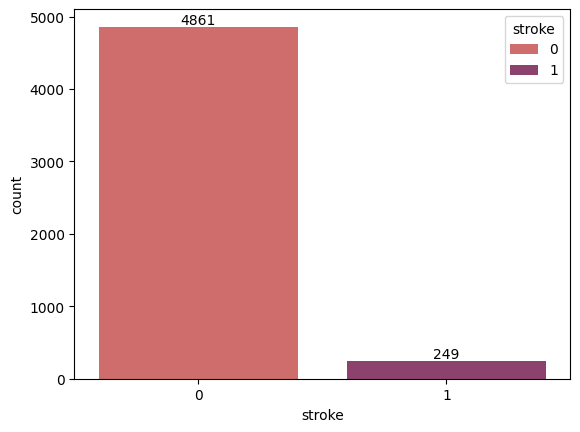

In [6]:
g = sns.countplot(data = stroke_df, x = 'stroke', hue = 'stroke', palette = 'flare')

for bars in g.containers:
    g.bar_label(bars)

#inbalaced dataset

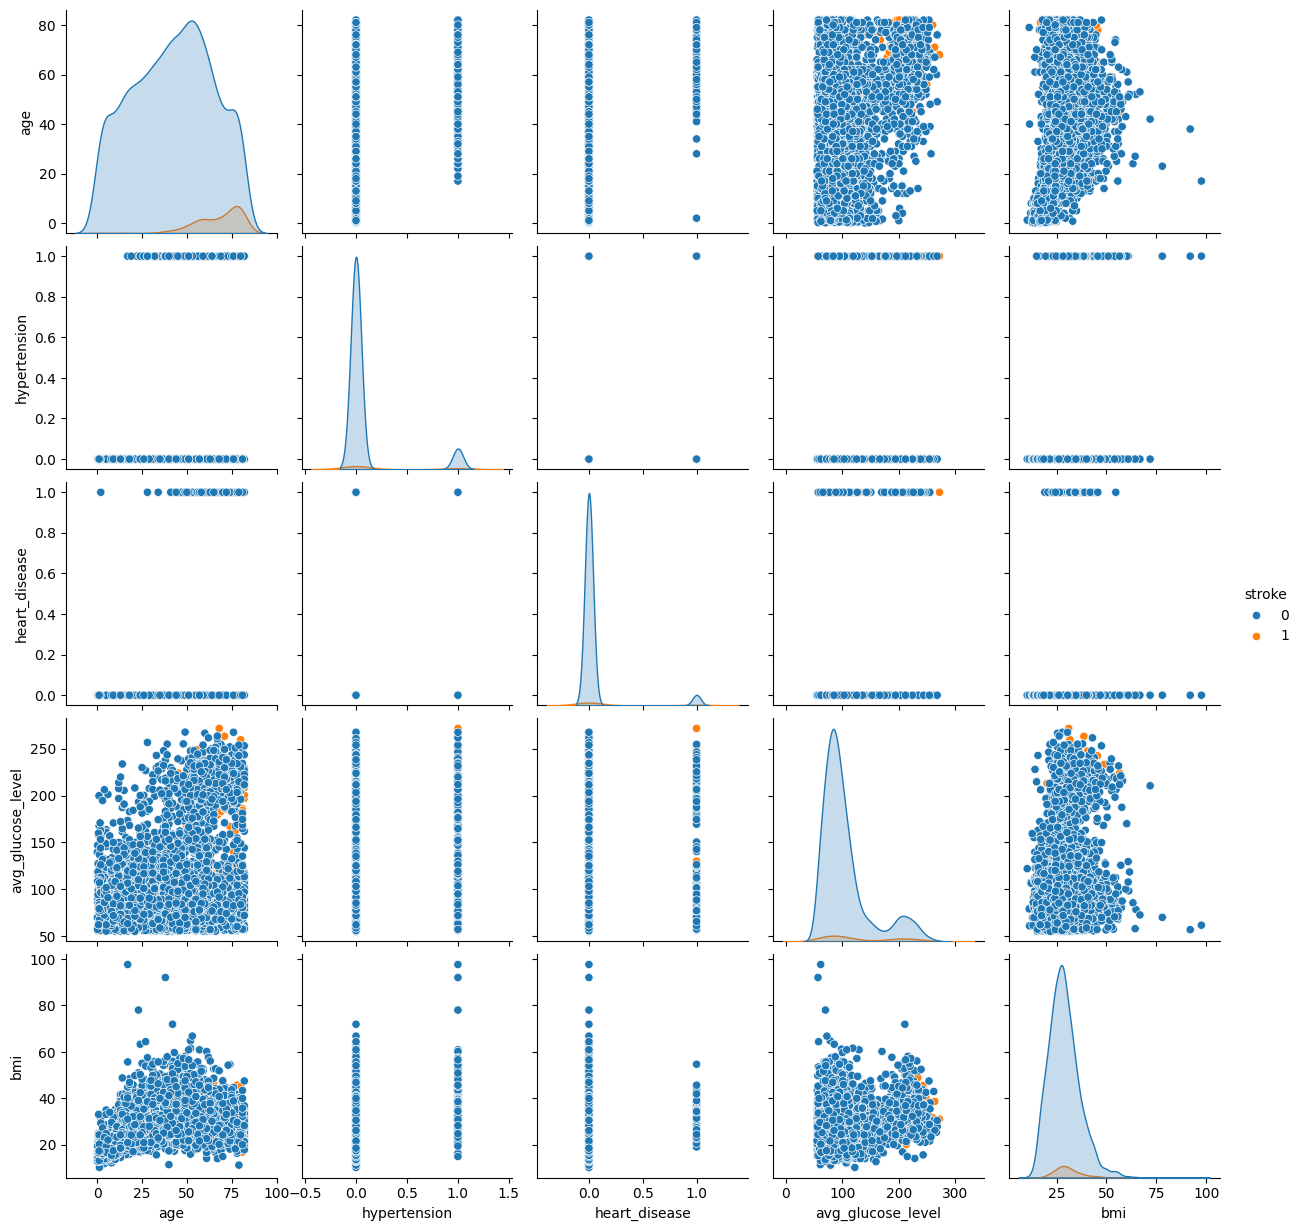

In [7]:
stroke_df.drop('id', axis = 1, inplace = True)
sns.pairplot(stroke_df, hue = 'stroke')

<Axes: >

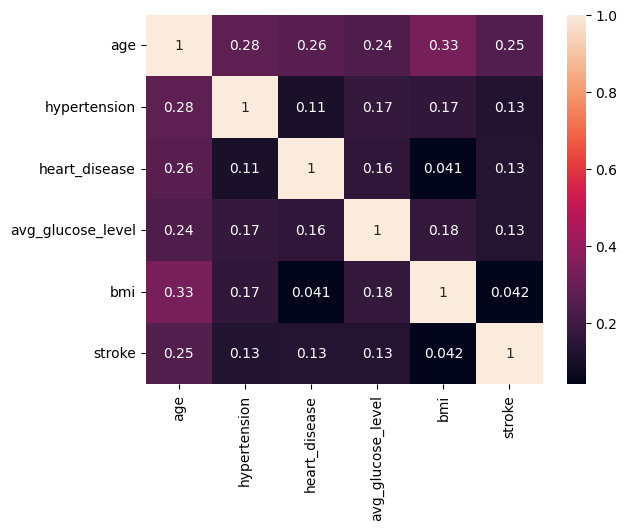

In [8]:
sns.heatmap(stroke_df.corr(numeric_only=True), annot=True)

In [9]:
stroke_df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [10]:
grouped_data = pd.DataFrame(stroke_df.groupby(['gender', 'stroke'])['gender'].count() / stroke_df.groupby(['gender'])['gender'].count())
grouped_data.columns = ['value']
grouped_data.reset_index()
grouped_data

value
gender stroke          
Female 0       0.952906
       1       0.047094
Male   0       0.948936
       1       0.051064
Other  0       1.000000

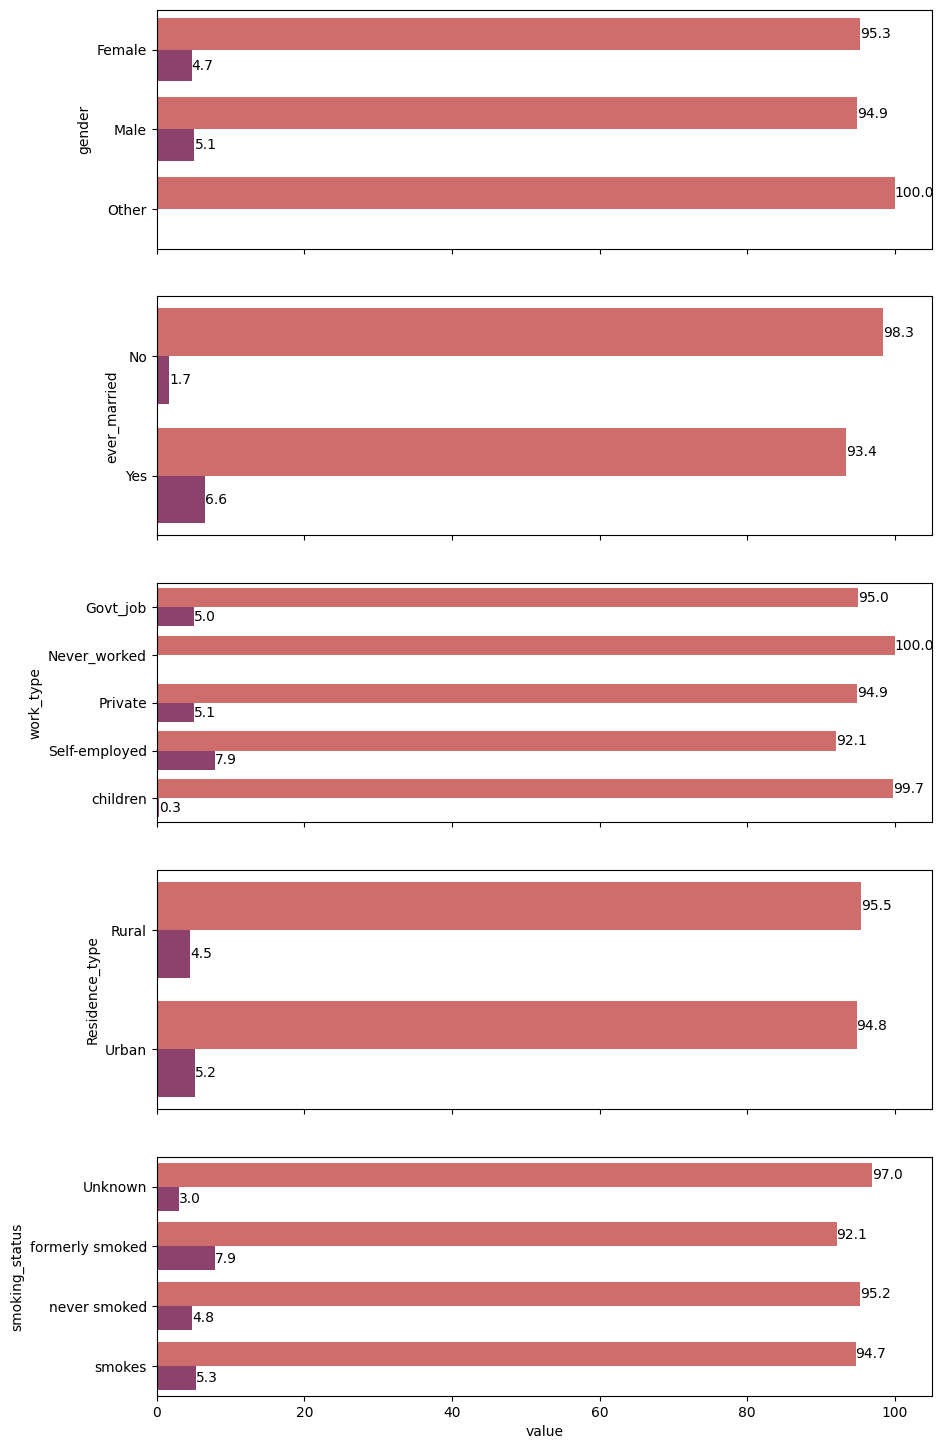

In [11]:
cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

f, axes = plt.subplots(5, 1, sharex = True, figsize = (10, 18))
plt.tight_layout
for a, col in zip(axes, cols):
    grouped_data = pd.DataFrame(100 * stroke_df.groupby([col, 'stroke'])[col].count() / stroke_df.groupby([col])[col].count())
    grouped_data.columns = ['value']

    g = sns.barplot(data = grouped_data, y = col, x = 'value', ax = a, hue = 'stroke', palette = 'flare', legend = False)

    for container in g.containers:
        g.bar_label(container, fmt='%.1f')



    

In [12]:
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Notes:
<lo>
    <li> gender, ever_married, work_type, residence_type, smoking_status - to boolean data
    <li> age, hypertension, heart_disease, avg_glucose_level - don't need action
    <li> bmi - fill with 21 (mid of 'healthy' range) // or get according to age (corr = 0.33) -> check if there are differences in performance

### Data transformation ###

Transform text data

In [13]:
cols_to_dummies = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in cols_to_dummies:
    dummies = pd.get_dummies(stroke_df[col], dtype = int)
    stroke_df = pd.concat([stroke_df, dummies], axis = 1)
    stroke_df.drop(col, axis = 1, inplace = True)

stroke_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Other,No,...,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,NaN,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


#### Fill BMI blanks ####

In [14]:
#fill with typical bmi
stroke_df['bmi_21'] = stroke_df['bmi'].fillna(21)
stroke_df.isnull().sum()


age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
stroke                 0
Female                 0
Male                   0
Other                  0
No                     0
Yes                    0
Govt_job               0
Never_worked           0
Private                0
Self-employed          0
children               0
Rural                  0
Urban                  0
Unknown                0
formerly smoked        0
never smoked           0
smokes                 0
bmi_21                 0
dtype: int64

In [15]:
#fill with bmi mean in age group
stroke_df['age'].value_counts()
#create bins
stroke_df  = pd.DataFrame(pd.concat([stroke_df, pd.cut(stroke_df['age'],
                           bins=(0,19,34,49,65,np.inf), 
                           labels=['Under 20','20_to_34','35_to_49','50_to_64','Over 65'])], axis = 1))
#rename new column
cols = list(stroke_df.columns[:-1])
stroke_df.columns = cols + ['age_bins']


In [16]:
stroke_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Other,No,...,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,bmi_21,age_bins
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,0,0,1,0,1,0,0,36.6,Over 65
1,61.0,0,0,202.21,NaN,1,1,0,0,0,...,1,0,1,0,0,0,1,0,21.0,50_to_64
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,0,1,0,0,0,1,0,32.5,Over 65
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,0,0,1,0,0,0,1,34.4,35_to_49
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,1,0,1,0,0,0,1,0,24.0,Over 65


In [17]:
bmi_per_age  = pd.DataFrame(stroke_df.groupby('age_bins')['bmi'].mean())
bmi_per_age = bmi_per_age.T.to_dict('records')[0]

C:\Users\wgrzynd\AppData\Local\Temp\ipykernel_14796\4134060496.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_per_age  = pd.DataFrame(stroke_df.groupby('age_bins')['bmi'].mean())


In [18]:
#stroke_df_copy = stroke_df
stroke_df['bmi_mean']= stroke_df['age_bins'].apply(lambda x: bmi_per_age.get(x))
stroke_df['bmi_mean'] = stroke_df['bmi_mean'].astype(float)

stroke_df['bmi_mean'] = stroke_df['bmi'].fillna(stroke_df['bmi_mean'])

stroke_df.isnull().sum()

age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
stroke                 0
Female                 0
Male                   0
Other                  0
No                     0
Yes                    0
Govt_job               0
Never_worked           0
Private                0
Self-employed          0
children               0
Rural                  0
Urban                  0
Unknown                0
formerly smoked        0
never smoked           0
smokes                 0
bmi_21                 0
age_bins               0
bmi_mean               0
dtype: int64

### Create train and test sets ###

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
stroke_df = stroke_df.drop(['bmi', 'age_bins'], axis = 1)

In [21]:
#X = stroke_df.drop(['stroke', 'bmi_21'], axis = 1)
X = stroke_df.drop(['stroke', 'bmi_mean'], axis = 1)
y = stroke_df['stroke']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42, stratify=y)

In [23]:
print(np.mean(y_test))

0.04860699466508595


In [24]:
print(np.mean(y_train), np.mean(y_test), np.mean(y))


0.04878761320479112 0.04860699466508595 0.0487279843444227


In [24]:
X_train.isnull().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
Female               0
Male                 0
Other                0
No                   0
Yes                  0
Govt_job             0
Never_worked         0
Private              0
Self-employed        0
children             0
Rural                0
Urban                0
Unknown              0
formerly smoked      0
never smoked         0
smokes               0
bmi_21               0
dtype: int64

## Create model ##

#### Lasso Model ####

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [27]:
#without any params throws an error - ConvergenceWarning: lbfgs failed to converge (status=1)
logreg_l1 = Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l1'))
        ])


In [28]:
logreg_l1.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced', penalty='l1',
                                    solver='liblinear'))])

In [29]:
y_pred_log_l1 = logreg_l1.predict(X_test)
y_pred_log_proba_l1 = logreg_l1.predict_proba(X_test)

In [30]:
#Check coefficients

for idx, col in enumerate(X_test.columns):
    print(f"{col}: {logreg_l1['model'].coef_[0][idx]}")

age: 1.8353309855523356
hypertension: 0.1795890558521366
heart_disease: 0.043633766739107724
avg_glucose_level: 0.2249497329803232
Female: 0.10737073566356711
Male: 0.0
Other: -0.017902537485736433
No: 0.023052447069054047
Yes: -3.1480170524715466e-08
Govt_job: 0.02153855690413833
Never_worked: -0.06478510069208034
Private: 0.0
Self-employed: -0.06184646774142879
children: 0.33125420849882475
Rural: -0.00033194643081095794
Urban: 0.01606483279521637
Unknown: 0.0
formerly smoked: 0.08751209639332408
never smoked: -0.08330163667405668
smokes: 0.1507880636985389
bmi_21: -0.17998670624866978


In [31]:
#Male, Private, Yes, Unknown <-- coef_ = 0 could be removed
stroke_df = stroke_df.drop(['Male', 'Unknown', 'Private', 'Yes'], axis = 1)

#### RidgeClassifier ####

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42, stratify=y)

In [33]:
from sklearn.linear_model import RidgeClassifierCV, RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [43]:
parameters = {'alpha' : np.linspace(0.01, 5, 100)}

ridge_cv = GridSearchCV(RidgeClassifier(alpha = 1., class_weight='balanced'), parameters, scoring='f1', cv = 3)

In [44]:
ridge = Pipeline([
    ("scaler", MinMaxScaler()),
    ("model", ridge_cv) 
])



In [48]:
ridge.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 GridSearchCV(cv=3,
                              estimator=RidgeClassifier(class_weight='balanced'),
                              param_grid={'alpha': array([0.01      , 0.06040404, 0.11080808, 0.16121212, 0.21161616,
       0.2620202 , 0.31242424, 0.36282828, 0.41323232, 0.46363636,
       0.5140404 , 0.56444444, 0.61484848, 0.66525253, 0.71565657,
       0.76606061, 0.81646465, 0.86686869, 0.91727273, 0....
       3.28626263, 3.33666667, 3.38707071, 3.43747475, 3.48787879,
       3.53828283, 3.58868687, 3.63909091, 3.68949495, 3.73989899,
       3.79030303, 3.84070707, 3.89111111, 3.94151515, 3.99191919,
       4.04232323, 4.09272727, 4.14313131, 4.19353535, 4.24393939,
       4.29434343, 4.34474747, 4.39515152, 4.44555556, 4.4959596 ,
       4.54636364, 4.59676768, 4.64717172, 4.69757576, 4.7479798 ,
       4.79838384, 4.84878788, 4.89919192, 4.94959596, 5.        ])},
                              scoring='f1'))])

In [49]:
ridge['model'].best_estimator_

RidgeClassifier(alpha=0.01, class_weight='balanced')

In [50]:

y_pred_ridge = ridge.predict(X_test)
y_pred_ridge_proba = ridge.decision_function(X_test)
y_pred_ridge_proba

array([0.25980092, 0.58129735, 0.1239709 , ..., 0.80079751, 0.17773883,
       0.32504549])

#### Evaluate model ####

In [51]:
#roc_auc_score - for highly unbalanced data
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [52]:
print(f"Logreg_l1 auc: {roc_auc_score(y_test, y_pred_log_proba_l1[:,1])}")
print(f"Ridge auc: {roc_auc_score(y_test, y_pred_ridge_proba[:])}")

Logreg_l1 auc: 0.8401717194742041
Ridge auc: 0.8411822809816883


In [53]:
print("Logreg l1 classification report")
print(classification_report(y_test, y_pred_log_l1))

print("Ridge classification report")
print(classification_report(y_test, y_pred_ridge))

Logreg l1 classification report
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1605
           1       0.13      0.80      0.22        82

    accuracy                           0.73      1687
   macro avg       0.56      0.77      0.53      1687
weighted avg       0.94      0.73      0.81      1687

Ridge classification report
              precision    recall  f1-score   support

           0       0.99      0.71      0.83      1605
           1       0.13      0.80      0.22        82

    accuracy                           0.72      1687
   macro avg       0.56      0.76      0.52      1687
weighted avg       0.94      0.72      0.80      1687



In [55]:
print("Logreg l1 confusion matrix")
print(confusion_matrix(y_test, y_pred_log_l1))

print("Ridge confusion matrox")
print(confusion_matrix(y_test, y_pred_ridge))

Logreg l1 confusion matrix
[[1165  440]
 [  16   66]]
Ridge confusion matrox
[[1145  460]
 [  16   66]]
